## Importing all the packages

In [1]:
import numpy as np
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix
import itertools
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import statsmodels.api as sm
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Loading the dataset

In [2]:
# Load dataset
names = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed',
        'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved']
cc_apps = pd.read_csv('crx.data.csv',  names = names)

# Inspect data
cc_apps.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


## Summarizing the data

In [3]:
#Lets summarize the distribution of each attribute
set_option('precision',1)
print(cc_apps.describe())
##Seems the values are ranging between different values and so scaling should be able to get
#better results 

        Debt  YearsEmployed  CreditScore    Income
count  690.0          690.0        690.0     690.0
mean     4.8            2.2          2.4    1017.4
std      5.0            3.3          4.9    5210.1
min      0.0            0.0          0.0       0.0
25%      1.0            0.2          0.0       0.0
50%      2.8            1.0          0.0       5.0
75%      7.2            2.6          3.0     395.5
max     28.0           28.5         67.0  100000.0


In [4]:
#Lets look at the correlation of the variables
set_option('precision',2)
print(cc_apps.corr(method='pearson'))

               Debt  YearsEmployed  CreditScore  Income
Debt           1.00           0.30         0.27    0.12
YearsEmployed  0.30           1.00         0.32    0.05
CreditScore    0.27           0.32         1.00    0.06
Income         0.12           0.05         0.06    1.00


In [5]:
# Print summary statistics
cc_apps_description = cc_apps.describe()
print(cc_apps_description)

print("\n")

# Print DataFrame information
cc_apps_info = cc_apps.info()
print(cc_apps_info)

print("\n")

#Inspect missing values in the dataset
cc_apps.tail(17)

         Debt  YearsEmployed  CreditScore     Income
count  690.00         690.00       690.00     690.00
mean     4.76           2.22         2.40    1017.39
std      4.98           3.35         4.86    5210.10
min      0.00           0.00         0.00       0.00
25%      1.00           0.17         0.00       0.00
50%      2.75           1.00         0.00       5.00
75%      7.21           2.62         3.00     395.50
max     28.00          28.50        67.00  100000.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsE

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
673,?,29.50,2.00,y,p,e,h,2.00,f,f,0,f,g,00256,17,-
674,a,37.33,2.50,u,g,i,h,0.21,f,f,0,f,g,00260,246,-
675,a,41.58,1.04,u,g,aa,v,0.67,f,f,0,f,g,00240,237,-
676,a,30.58,10.66,u,g,q,h,0.09,f,t,12,t,g,00129,3,-
677,b,19.42,7.25,u,g,m,v,0.04,f,t,1,f,g,00100,1,-
678,a,17.92,10.21,u,g,ff,ff,0.00,f,f,0,f,g,00000,50,-
679,a,20.08,1.25,u,g,c,v,0.00,f,f,0,f,g,00000,0,-
680,b,19.50,0.29,u,g,k,v,0.29,f,f,0,f,g,00280,364,-
681,b,27.83,1.00,y,p,d,h,3.00,f,f,0,f,g,00176,537,-
682,b,17.08,3.29,u,g,i,v,0.34,f,f,0,t,g,00140,2,-


## Visualizing the distributions of the data

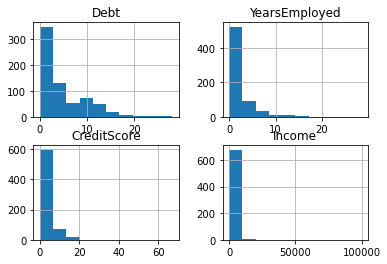

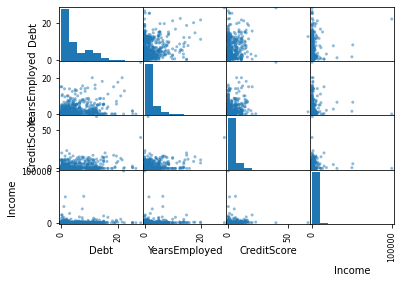

In [7]:
#Data Visualizations
#histograms
cc_apps.hist()
plt.show()
# scatter plot matrix
scatter_matrix(cc_apps)
plt.show()

## Eliminating missing values

In [8]:
# Import numpy
import numpy as np

# Inspect missing values in the dataset
print(cc_apps.tail(17))

# Replace the '?'s with NaN
cc_apps = cc_apps.replace('?', np.nan)

# Inspect the missing values again
cc_apps.tail(17)

    Gender    Age   Debt Married BankCustomer EducationLevel Ethnicity  \
673      ?  29.50   2.00       y            p              e         h   
674      a  37.33   2.50       u            g              i         h   
675      a  41.58   1.04       u            g             aa         v   
676      a  30.58  10.66       u            g              q         h   
677      b  19.42   7.25       u            g              m         v   
678      a  17.92  10.21       u            g             ff        ff   
679      a  20.08   1.25       u            g              c         v   
680      b  19.50   0.29       u            g              k         v   
681      b  27.83   1.00       y            p              d         h   
682      b  17.08   3.29       u            g              i         v   
683      b  36.42   0.75       y            p              d         v   
684      b  40.58   3.29       u            g              m         v   
685      b  21.08  10.09       y      

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
673,NaN,29.50,2.00,y,p,e,h,2.00,f,f,0,f,g,00256,17,-
674,a,37.33,2.50,u,g,i,h,0.21,f,f,0,f,g,00260,246,-
675,a,41.58,1.04,u,g,aa,v,0.67,f,f,0,f,g,00240,237,-
676,a,30.58,10.66,u,g,q,h,0.09,f,t,12,t,g,00129,3,-
677,b,19.42,7.25,u,g,m,v,0.04,f,t,1,f,g,00100,1,-
678,a,17.92,10.21,u,g,ff,ff,0.00,f,f,0,f,g,00000,50,-
679,a,20.08,1.25,u,g,c,v,0.00,f,f,0,f,g,00000,0,-
680,b,19.50,0.29,u,g,k,v,0.29,f,f,0,f,g,00280,364,-
681,b,27.83,1.00,y,p,d,h,3.00,f,f,0,f,g,00176,537,-
682,b,17.08,3.29,u,g,i,v,0.34,f,f,0,t,g,00140,2,-


In [9]:
# Impute the missing values with mean imputation
cc_apps.fillna(cc_apps.mean(), inplace=True)

# Count the number of NaNs in the dataset to verify
print(cc_apps.isnull().sum())

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
Approved           0
dtype: int64


In [10]:
# Iterate over each column of cc_apps
for col in cc_apps.columns:
    # Check if the column is of object type
    if cc_apps[col].dtypes == 'object':
        # Impute with the most frequent value
        cc_apps = cc_apps.fillna(cc_apps[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify
print(cc_apps.isnull().sum())

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64


## Training and Testing the Data

In [11]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le=LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in cc_apps.columns.to_numpy():
    # Compare if the dtype is object
    if cc_apps[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        cc_apps[col]=le.fit_transform(cc_apps[col])

In [12]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Drop the features 11 and 13 and convert the DataFrame to a NumPy array
cc_apps = cc_apps.drop(['DriversLicense', 'ZipCode'], axis=1)
cc_apps = cc_apps.to_numpy()

# Segregate features and labels into separate variables
X,y = cc_apps[:,0:13] , cc_apps[:,13]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X
                                                    ,
                                                    y,
                                                    test_size=0.3,
                                                   random_state = 42)

## Evaluating different models

In [16]:
#Lets define the cross validation metrics for defining the train and test data
#Lets use 10-fold validation and RMSE as the scoring parameter
num_folds = 5
seed =7
scoring = 'neg_mean_squared_error'

In [17]:
#Lets try different algorithms and see how it performs..
#Linear regression - relationship between dependent and independent variables using a 
#straight line
#When multicollinearity is an issue we go for regularizations which basically adds bias and 
#at the same time increases variance. Adding bias means we might leave out some variables 
#Ridge regression has less variables at the end
#LASSO keeps all the coeficients of the variables non-zero
#Elastic Net is a combination of the above two regularizations
#Classification and Regression Trees
#Support Vector Regression
#K-Nearest Neighbors (KNN)

models =[]
models.append(('LR',LinearRegression()))
models.append(('LASSO',Lasso()))
models.append(('EN',ElasticNet()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('SVR',SVR()))

In [18]:
#Evaluate each model
results =[]
names=[]
for name, model in models:
    kfold = KFold(n_splits=num_folds,random_state = seed)
    cv_results = cross_val_score(model,X_train,y_train,cv=kfold,scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)

LR: -0.106084 (0.010224)
LASSO: -0.275861 (0.083183)
EN: -0.245083 (0.066158)
KNN: -0.218798 (0.032779)
CART: -0.213338 (0.038933)
SVR: -0.248259 (0.045605)


C:\Users\dxday\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\dxday\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\dxday\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\dxday\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is 

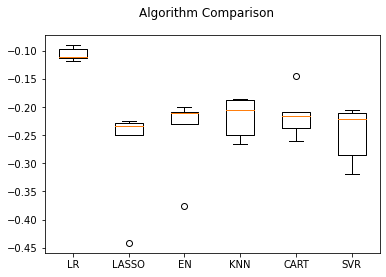

In [20]:
#Looking at the RMSE, we find LR seems to have lowest value and performing well along with CART.

#Lets take a look at the distribution of scores across all cross-validataion folds for each 
#algorithm

fig =plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

C:\Users\dxday\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\dxday\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\dxday\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\dxday\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is 

ScaledLR: -0.106084 (0.010224)
ScaledLASSO: -0.246622 (0.005455)
ScaledEN: -0.246622 (0.005455)
ScaledKNN: -0.115331 (0.011048)
ScaledCART: -0.205133 (0.047151)
ScaledSVR: -0.120436 (0.018170)


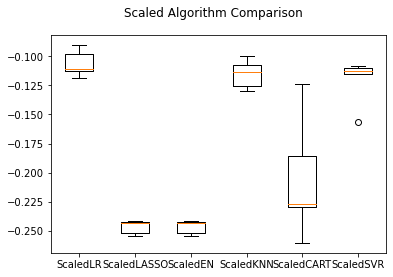

In [23]:
#Upto now, we did not do any standardization 
#Lets do the standardization using sklearn and perform these ML algorithms
# Standardize the dataset

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Comparing the accuracy of each model

In [24]:
# Standardizing/Scaling feature values
import pylab
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

y_train = y_train.reshape( (len(y_train),) )
y_test = y_test.reshape( (len(y_test),) )

In [25]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', splitter='best', max_depth = 10, random_state=0)
tree.fit(X_train_std, y_train)
X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [26]:
# Number of misclassification from the prediction model
y_pred = tree.predict(X_test_std)
print('Misclassifed DT_Sliding samples: %.2f' % (y_test != y_pred).sum())
print('----------------------------------------------------------')

#The % accuracy from the prediction model
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('----------------------------------------------------------')

Misclassifed DT_Sliding samples: 35.00
----------------------------------------------------------
Accuracy: 0.831
----------------------------------------------------------


In [27]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion = 'entropy', max_features= 'auto', n_estimators=10, random_state=1, n_jobs = -1)
forest.fit(X_train_std, y_train)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

#Number of misclassification from the prediction model
y_pred = forest.predict(X_test_std)
print('Misclassifed RF_Sliding samples: %.2f' % (y_test != y_pred).sum())
print('----------------------------------------------------------')

#The % accuracy from the prediction model
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('----------------------------------------------------------')

print(forest.feature_importances_)

Misclassifed RF_Sliding samples: 28.00
----------------------------------------------------------
Accuracy: 0.865
----------------------------------------------------------
[0.01920722 0.09720543 0.11392424 0.0195614  0.01520346 0.06683309
 0.03661851 0.13279224 0.22487767 0.05718472 0.09940791 0.00681758
 0.11036653]


In [28]:
from sklearn.svm import SVC
svm = SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
svm.fit(X_train_std, y_train)
#
y_test = y_test.reshape( (len(y_test) ,) )

#Number of misclassification from the prediction model
y_pred = svm.predict(X_test_std)
print('Misclassifed SVC_Sliding samples: %.2f' % (y_test != y_pred).sum())

#The % accuracy from the prediction model
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('---------------------------------------------------')

Misclassifed SVC_Sliding samples: 43.00
Accuracy: 0.79
---------------------------------------------------


In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, p=2, metric='minkowski', n_jobs=-1, leaf_size=30)
knn.fit(X_train_std, y_train)

y_pred = knn.predict(X_test_std)
print('Misclassifed KNN_Binning ROPavg samples: %.2f' % (y_test != y_pred).sum())

#The % accuracy from the prediction model
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('---------------------------------------------------')

Misclassifed KNN_Binning ROPavg samples: 29.00
Accuracy: 0.86
---------------------------------------------------


In [30]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(max_depth=6, random_state=0, loss='deviance', learning_rate=0.9, n_estimators=1000, criterion='friedman_mse', max_features= 'auto')
gbc.fit(X_train_std, y_train)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
#Number of misclassification from the prediction model
y_predgbc = gbc.predict(X_test_std)
print('---------------------------------------------------')
print('Misclassifed GBClassifier_Binning USAGE samples: %.2f' % (y_test != y_predgbc).sum())

#The % accuracy from the prediction model
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_predgbc))
print('---------------------------------------------------')

print(gbc.feature_importances_)

---------------------------------------------------
Misclassifed GBClassifier_Binning USAGE samples: 34.00
Accuracy: 0.84
---------------------------------------------------
[0.00579095 0.07047995 0.08678283 0.03129463 0.00901352 0.03828322
 0.0243372  0.06839455 0.54459951 0.04739574 0.00497264 0.01699096
 0.0516643 ]


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
import numpy as np

# Initializing Classifiers
clf1 = LogisticRegression(random_state=1,
                          solver='newton-cg',
                          multi_class='multinomial')
clf2 = GaussianNB()

In [32]:
clf1.fit(X_train_std, y_train)
y_pred = clf1.predict(X_test_std)
print('---------------------------------------------------')
print('Misclassifed LogisticRegressio_Binning USAGE samples: %.2f' % (y_test != y_pred).sum())

#The % accuracy from the prediction model
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('---------------------------------------------------')

---------------------------------------------------
Misclassifed LogisticRegressio_Binning USAGE samples: 30.00
Accuracy: 0.86
---------------------------------------------------


In [33]:
clf2.fit(X_train_std, y_train)
y_pred = clf2.predict(X_test_std)
print('---------------------------------------------------')
print('Misclassifed Naive_Binning USAGE samples: %.2f' % (y_test != y_pred).sum())

#The % accuracy from the prediction model
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('---------------------------------------------------')

---------------------------------------------------
Misclassifed Naive_Binning USAGE samples: 46.00
Accuracy: 0.78
---------------------------------------------------


## Using Logistic Regression for our prediction model

In [34]:
# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

In [35]:
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train,y_train)

LogisticRegression()

In [36]:
# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test,y_test))

# Print the confusion matrix of the logreg model
confusion_matrix(y_test,y_pred)

Accuracy of logistic regression classifier:  0.8405797101449275


array([[87, 10],
       [23, 87]], dtype=int64)

## Hyperparameter tuning

In [38]:
# Define the grid of values for tol and max_iter
tol = [0.01, 0.001 ,0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are the corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

In [42]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=10)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(X)

# Fit grid_model to the data
grid_model_result = grid_model.fit(rescaledX, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.852174 using {'max_iter': 100, 'tol': 0.01}


In [44]:
predictions = logreg.predict(rescaledX_test)
print(mean_squared_error(y_test, predictions))

0.15942028985507245


## Using stat model package to evaluate logistic regression model

In [45]:
cc_model = sm.Logit(y, X)

In [46]:
result = cc_model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.314383
         Iterations 8


In [47]:
result.params

array([-1.02746266e-01,  1.96873602e-03,  8.54380801e-03,  2.30178906e+00,
       -8.10983731e-01, -5.07274682e-02, -5.05118111e-02, -1.03624620e-01,
       -3.68309959e+00, -6.10135336e-01, -1.20611654e-01, -3.18853714e-02,
       -5.29683379e-04])

In [48]:
result.predict(X)

array([1.66594445e-01, 1.28739436e-01, 2.56743966e-01, 8.31019160e-02,
       2.37749557e-01, 3.10290976e-01, 2.08180884e-08, 2.84794206e-01,
       5.16464458e-01, 2.83993822e-01, 9.64259953e-01, 3.65688460e-01,
       4.08447570e-01, 8.81530212e-01, 9.94032173e-02, 1.73201493e-01,
       1.52564431e-01, 5.10108060e-02, 4.14622100e-01, 1.62930329e-01,
       2.23773515e-02, 3.80602199e-01, 6.95444436e-02, 1.82889798e-01,
       2.07431443e-01, 2.33277066e-01, 1.32795150e-01, 2.46635171e-02,
       1.91588196e-01, 4.52369770e-04, 1.49979842e-01, 6.13661436e-02,
       3.63006381e-03, 6.15757159e-02, 1.01948017e-01, 4.92403903e-02,
       6.15170557e-02, 1.48082699e-01, 3.18062117e-01, 3.40279615e-02,
       6.34959446e-02, 2.66017454e-02, 1.93950904e-01, 6.26907511e-02,
       6.39949895e-04, 1.20251386e-01, 2.85607342e-02, 1.49397602e-01,
       9.68354219e-01, 9.65718154e-01, 4.80602934e-01, 2.85067656e-01,
       2.43065160e-02, 3.19622333e-01, 3.27803767e-01, 4.09130473e-01,
      

In [49]:
result.pred_table()

array([[278.,  29.],
       [ 59., 324.]])

In [50]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  690
Model:                          Logit   Df Residuals:                      677
Method:                           MLE   Df Model:                           12
Date:                Mon, 06 Dec 2021   Pseudo R-squ.:                  0.5424
Time:                        09:26:30   Log-Likelihood:                -216.92
converged:                       True   LL-Null:                       -474.08
Covariance Type:            nonrobust   LLR p-value:                1.995e-102
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1027      0.270     -0.381      0.703      -0.632       0.426
x2             0.0020      0.001      1.436      0.151      -0.001       0.005
x3             0.0085      0.025      0.335      0.737      -0.041       0.058
x4             2.3018      0.374      6.148      0.000       1.568       3.036
x5            -0.8110      0.281     -2.888      0.004      -1.361      -0.261
x6            -0.0507      0.028     -1.825      0.068      -0.105       0.004
x7            -0.0505      0.050     -1.009      0.313      -0.149       0.048
x8            -0.1036      0.046     -2.240      0.025      -0.194      -0.013
x9            -3.6831      0.315    -11.705      0.000      -4.300      -3.066
x10           -0.6101      0.347     -1.761      0.078      -1.289       0.069
x11           -0.1206      0.056     -2.166      0.030      -0.230      -0.011
x12           -0.0319      0.215     -0.148      0.882      -0.454       0.390
x13           -0.0005      0.000     -3.435      0.001      -0.001      -0.000
==============================================================================
"""

# Conclusion
### After the first round of evaluating logistic regression seemed to have the best fit with LASSO and EN having a good fit after standardizing the data

### The second round showed that Random Forests had the best accuracy with KNN and Logistic Regression right behind.

### Considering both evaluations, logistic regression seemed to be the best algorithm to go with for the dataset

### Hyperparameter tuning with a cross-validation of 10 folds gave us a final accuracy of 0.8522 and an MSE of 0.15942